## Python wrapper for nni restful APIs

nni provides nnicli module as a python wrapper for its restful APIs, which can be used to retrieve nni experiment and trial job information in your python code. This notebook shows how to use nnicli module.

Following are the functions available in nnicli module:

#### start_nni(config_file)
Starts nni experiment with specified configuration file

#### stop_nni()
Stop nni experiment.

#### set_endpoint(endpoint)
Set nni endpoint for nnicli, the endpoint is showed while nni experiment is started successfully using nnictl command or start_nni function

#### version()
Returns nni version

#### get_experiment_profile()
Returns experiment profile.

#### get_experiment_status()
Returns nni experiment status.

#### get_job_metrics(trial_job_id)
Returns specified trial job metrics, including final results and intermediate results.

#### get_job_statistics()
Returns trial job statistics information

#### get_trial_job(trial_job_id)
Returns information of a specified trial job.

#### list_trial_jobs()
Returns information of all trial jobs of current experiment.

### Start nni experiment using specified configuration file
Let's use a configruation file in nni examples directory to start an experiment.

In [27]:
! cat ../trials/mnist/config.yml

authorName: default
experimentName: example_mnist
trialConcurrency: 1
maxExecDuration: 1h
maxTrialNum: 10
#choice: local, remote, pai
trainingServicePlatform: local
searchSpacePath: search_space.json
#choice: true, false
useAnnotation: false
tuner:
  #choice: TPE, Random, Anneal, Evolution, BatchTuner, MetisTuner, GPTuner
  #SMAC (SMAC should be installed through nnictl)
  builtinTunerName: TPE
  classArgs:
    #choice: maximize, minimize
    optimize_mode: maximize
trial:
  command: python3 mnist.py
  codeDir: .
  gpuNum: 0


In [2]:
import nnicli as nc
nc.start_nni(config_file='../trials/mnist/config.yml')

INFO: expand searchSpacePath: search_space.json to /mnt/d/Repos/nni/examples/trials/mnist/search_space.json
INFO: expand codeDir: . to /mnt/d/Repos/nni/examples/trials/mnist/.
INFO: Starting restful server...
INFO: Successfully started Restful server!
INFO: Setting local config...
INFO: Successfully set local config!
INFO: Starting experiment...
INFO: Successfully started experiment!
-----------------------------------------------------------------------
The experiment id is PlUIfDTR
The Web UI urls are: http://172.18.17.1:8080   http://10.172.121.40:8080   http://10.0.75.1:8080   http://127.0.0.1:8080
-----------------------------------------------------------------------

You can use these commands to get more information about the experiment
-----------------------------------------------------------------------
commands                       description
1. nnictl experiment show        show the information of experiments
2. nnictl trial ls               list all of trial jobs
3. nn

### Connect nnicli module to started nni experiment
Call set_endpoint to connect nnicli moduele to the rest server of started nni experiment. Local mode training serviced is used in this notebook, but nnicli module can connect to any started nni experiment. The endpoint can be found in the output of start_nni function.

In [14]:
nc.set_endpoint('http://127.0.0.1:8080')

### Retrieve nni experiment and trial job information

In [15]:
nc.get_experiment_status()

{'errors': [], 'status': 'RUNNING'}

In [28]:
nc.get_job_statistics()

[{'trialJobNumber': 4, 'trialJobStatus': 'SUCCEEDED'},
 {'trialJobNumber': 1, 'trialJobStatus': 'RUNNING'}]

In [21]:
nc.get_experiment_profile()

{'execDuration': 1117,
 'id': 'PlUIfDTR',
 'logDir': '/home/chicm/nni/experiments/PlUIfDTR',
 'maxSequenceId': 3,
 'params': {'authorName': 'default',
  'clusterMetaData': [{'key': 'codeDir',
    'value': '/mnt/d/Repos/nni/examples/trials/mnist/.'},
   {'key': 'command', 'value': 'python3 mnist.py'}],
  'experimentName': 'example_mnist',
  'maxExecDuration': 3600,
  'maxTrialNum': 10,
  'searchSpace': '{"hidden_size": {"_value": [124, 512, 1024], "_type": "choice"}, "batch_size": {"_value": [1, 4, 8, 16, 32], "_type": "choice"}, "conv_size": {"_value": [2, 3, 5, 7], "_type": "choice"}, "dropout_rate": {"_value": [0.5, 0.9], "_type": "uniform"}, "learning_rate": {"_value": [0.0001, 0.001, 0.01, 0.1], "_type": "choice"}}',
  'trainingServicePlatform': 'local',
  'trialConcurrency': 1,
  'tuner': {'builtinTunerName': 'TPE',
   'checkpointDir': '/home/chicm/nni/experiments/PlUIfDTR/checkpoint',
   'classArgs': {'optimize_mode': 'maximize'},
   'className': 'TPE'},
  'versionCheck': True},


Let's define an utility function to format json string returned by nnicli module.

In [22]:
import json
def show_json(res):
    print(json.dumps(res, indent=4))

In [23]:
show_json(nc.get_experiment_profile())

{
    "params": {
        "searchSpace": "{\"hidden_size\": {\"_value\": [124, 512, 1024], \"_type\": \"choice\"}, \"batch_size\": {\"_value\": [1, 4, 8, 16, 32], \"_type\": \"choice\"}, \"conv_size\": {\"_value\": [2, 3, 5, 7], \"_type\": \"choice\"}, \"dropout_rate\": {\"_value\": [0.5, 0.9], \"_type\": \"uniform\"}, \"learning_rate\": {\"_value\": [0.0001, 0.001, 0.01, 0.1], \"_type\": \"choice\"}}",
        "clusterMetaData": [
            {
                "key": "codeDir",
                "value": "/mnt/d/Repos/nni/examples/trials/mnist/."
            },
            {
                "key": "command",
                "value": "python3 mnist.py"
            }
        ],
        "tuner": {
            "classArgs": {
                "optimize_mode": "maximize"
            },
            "builtinTunerName": "TPE",
            "checkpointDir": "/home/chicm/nni/experiments/PlUIfDTR/checkpoint",
            "className": "TPE"
        },
        "maxTrialNum": 10,
        "maxExecDuratio

In [25]:
show_json(nc.list_trial_jobs())

[
    {
        "startTime": 1564484995992,
        "hyperParameters": [
            "{\"parameter_source\":\"algorithm\",\"parameter_id\":0,\"parameter_index\":0,\"parameters\":{\"batch_size\":8,\"conv_size\":3,\"hidden_size\":1024,\"learning_rate\":0.0001,\"dropout_rate\":0.8055724367106529}}"
        ],
        "id": "BW0NR",
        "endTime": 1564485259753,
        "status": "SUCCEEDED",
        "sequenceId": 0,
        "finalMetricData": [
            {
                "parameterId": "0",
                "type": "FINAL",
                "trialJobId": "BW0NR",
                "timestamp": 1564485258774,
                "data": "0.9078999757766724",
                "sequence": 0
            }
        ],
        "logPath": "file://localhost:/home/chicm/nni/experiments/PlUIfDTR/trials/BW0NR"
    },
    {
        "startTime": 1564485271947,
        "hyperParameters": [
            "{\"parameter_source\":\"algorithm\",\"parameter_id\":1,\"parameter_index\":0,\"parameters\":{\"batch_siz

### Visualizing nni experiment result

With the retrieved trial job information, we can do some analysis by visualizing the metric data, below is a simple example.

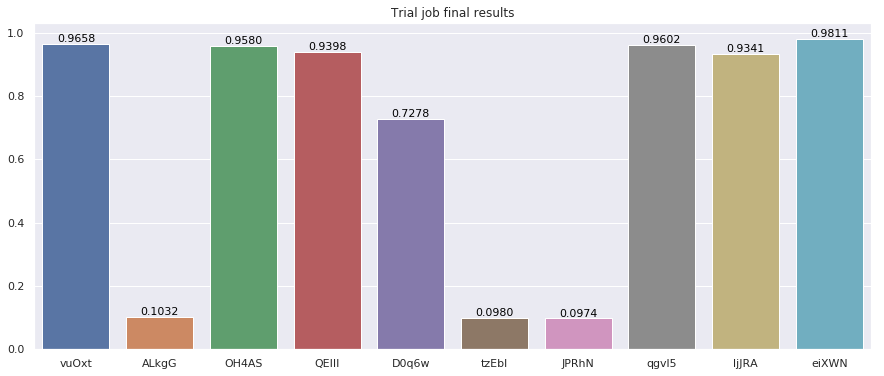

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

jobs = nc.list_trial_jobs()
job_ids = [x['id'] for x in jobs]
final_metrics = [float(x['finalMetricData'][0]['data']) for x in jobs]

data = {'job id': job_ids, 'final metrics': final_metrics}
sns.set(rc={'figure.figsize':(15, 6)})

plt.title('Trial job final results')
ax = sns.barplot(x='job id', y='final metrics', data=data) 

for i,p in enumerate(ax.patches):
    ax.annotate('{:.4f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 5),
                 textcoords='offset points') 

### Stop nni experiment

In [29]:
nc.stop_nni()

INFO: Stoping experiment PlUIfDTR
INFO: Stop experiment success.
